# <ins> Job Satisfication - Analyzing Employee Exit Surveys </ins>

**In this project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.**


These two datasets holds the information about the employees and their reasons for resignation. Here are the links for both dataset.

   * [TAFE](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey)
   * [DETE](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey)

In this project, we'll try to answer the following questions:

Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

# Prerequisites

For this project we will use followng libraries:
* Pandas
* Numpy
* Matplotlib
* Seaborn

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Data Exploration

In [2]:
#reading dataset.
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')
tafe_survey = pd.read_csv('tafe_survey.csv')

## Task1: Data information

In [3]:
dete_survey.info()
dete_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             788 non-null object
DETE Start Date                        749 non-null float64
Role Start Date                        724 non-null float64
Position                               817 non-null object
Classification                         455 non-null object
Region                                 717 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work envir

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
tafe_survey.info()
tafe_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [5]:
dete_survey.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Professional Development',
       'Opportunities for promotion', 'Staff morale', 'Workplace issue',
       'Physical environment', 'Worklife balance',
       'Stress and pressure support', 'Performance of supervisor',
       'Peer support', 'Initiative', 'Skills', 'Coach', 'Career Aspirations',
       'Feedback', 'Further PD', 'Communication', 'My say', 'Inform

In [6]:
tafe_survey.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Main Factor. Which of these was the main factor for leaving?',
       'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate oppo

Both of the dataset contains the information about reasons for resignation. we will combined the information from both dataset for further analysis.

Tasks:
* Decide and combine dissatisfication factor into single column.
* Create year of working column. 
* Clean the age column in order to split the employees into different group.
* Change into NaN when information is not provided.

Lets look into both dataset what are the similar reason for job dissatisfaction.

In [7]:
# DETE 
dete_survey.SeparationType.unique()

array(['Ill Health Retirement', 'Voluntary Early Retirement (VER)',
       'Resignation-Other reasons', 'Age Retirement',
       'Resignation-Other employer',
       'Resignation-Move overseas/interstate', 'Other',
       'Contract Expired', 'Termination'], dtype=object)

In [8]:
# TAFE
tafe_survey['Reason for ceasing employment'].unique()

array(['Contract Expired', 'Retirement', 'Resignation',
       'Retrenchment/ Redundancy', 'Termination', 'Transfer', nan],
      dtype=object)

As we see that, there are three different type of Resignation:

* Resignation-Other reasons
* Resignation-Other employer
* Resignation-Move overseas/interstate

We will combine them in one column for further analysis.

## Task 2: Missing Value.

In [9]:
# DETE
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                              34
DETE Start Date                         73
Role Start Date                         98
Position                                 5
Classification                         367
Region                                 105
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [10]:
# TAFE
tafe_survey.isnull().sum()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

From the above observation, we can see that, there is missing data in both dataset. 

In dete_survey dataset: DETE Start Date, Cease Date and Age are important column for analysis.
In tafe_survey dataset: Contributing Factors and Current Age column.

# Data Cleaning

During Data Cleaning we will be performing following tasks:
* Remove unnecessary columns.
* Clean Column name for more readable and standartize them in both datasets.
* Filter the Data.
* Check for any logical inconsistencies.
* Create new columns.
* Decide how to categorize the data of our interest.

## Task 1: Remove unnecessary columns

In [11]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

The reason to remove those columns is keep only general information about employee and reason for resignation.

## Task 2: Clean Column name for more readable and standardize them in both datasets.

Both Dataset have identical column with different name. It is good practice to standardize the column name.

In [12]:
#dete_survey_updated
col = [i.lower().replace(" ", '_').strip() for i in dete_survey_updated.columns]
dete_survey_updated.columns = col

In [13]:
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [14]:
#tafe_survey_updated 
new_col={
    'Record ID': 'id',
    'CESSATION YEAR': 'cease_date',
    'Reason for ceasing employment': 'separationtype',
    'Gender. What is your Gender?': 'gender',
    'CurrentAge. Current Age': 'age',
    'Employment Type. Employment Type': 'employment_status',
    'Classification. Classification': 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
}

tafe_survey_updated.rename(columns=new_col, inplace=True)

## Task 3: Selecting Resignation Reason
Let check the unique values in the separationtype columns in both datasets.

In [15]:
# DETE separation types
dete_survey_updated['separationtype'].value_counts(dropna=False)

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [16]:
# TAFE separation types
tafe_survey_updated['separationtype'].value_counts(dropna=False)

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: separationtype, dtype: int64

We will use separation type to be Resignation to analyze the data. For that purpose we will retrieve resignation.

In [17]:
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].str.contains(r"Resignation")].copy()

In [18]:
tafe_survey_updated = tafe_survey_updated[tafe_survey_updated['separationtype'].notna()].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'].str.contains(r"Resignation")]

In [19]:
dete_resignations.separationtype.value_counts(dropna=False)

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

In [20]:
tafe_resignations.separationtype.value_counts(dropna=False)

Resignation    340
Name: separationtype, dtype: int64

## Taske 4: Verify the Data
Lets verify that the years in the cease_dete and dete_start_date columns make sense.

* Since the cease_date is the last year of the person's employment and the dete_start_date is the person's first year of employment, it wouldn't make sense to have years after the current date.


* Given that most people in this field start working in their 20s, it's also unlikely that the dete_start_date was before the year 1940.

In [21]:
dete_resignations.cease_date.value_counts(dropna=False)

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
NaN         11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
2010         1
09/2010      1
07/2006      1
Name: cease_date, dtype: int64

Dates are reasonable. Let extract the year and asign back to the  cease_date column.

But before that will drop the row with NaN year.

In [22]:
dete_resignations.cease_date.dropna(axis=0, inplace=True)

In [23]:
dete_resignations['cease_date'] = dete_resignations.cease_date.str.split("/").str[-1].astype(float)
dete_resignations.cease_date.value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

Now let explore dete_start_date column in dete_resignations

In [24]:
dete_resignations.dete_start_date.value_counts().sort_index()

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

Lets draw box plot to check if there is any outliers in dete_start_date column of dete_resignations.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



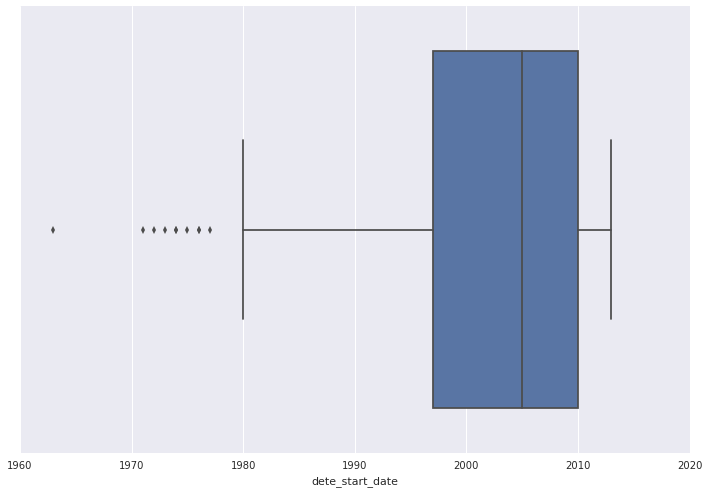

In [25]:
plt.figure(figsize=(12,8))
sns.boxplot(dete_resignations.dete_start_date)


1963 is outliers here. We will exclude it for further analysis. 

In [26]:
dete_resignations = dete_resignations[~(dete_resignations.dete_start_date == 1963.0)]

In [27]:
tafe_resignations.cease_date.value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

There is no abnormal with the cease_date column in tafe_resignations.

## Creating new columns

We need to find the period an employee was in service. For that, we will subtract dete_resignations['cease_date'], dete_resignations['dete_start_date'] and assign to the new column called institute_service.

In [28]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
dete_resignations[['cease_date','dete_start_date','institute_service']].head()

,cease_date,dete_start_date,institute_service
3,2012.0,2005.0,7.0
5,2012.0,1994.0,18.0
8,2012.0,2009.0,3.0
9,2012.0,1997.0,15.0
11,2012.0,2009.0,3.0


Both dataset have columns that describe dissatisfaction. 

For DETE Survey:
 - job_dissatisfaction
 - dissatisfaction_with_the_department 
 - physical_work_environment
 - lack_of_recognition
 - lack_of_job_security
 - work_location
 - employment_conditions
 - work_life_balance
 - workload
 
For TAFE Survey:
 - Contributing Factors. Dissatisfaction
 - Contributing Factors. Job Dissatisfaction
 
If the employee indicated any of the factors above caused them to resign, we'll mark them as 'dissatisfied' in a new column.
 

In the TAFE Survey, We will Convert the values in the 'Contributing Factors. Dissatisfaction' and 'Contributing Factors. Job Dissatisfaction' columns to True, False, or NaN values.

If any of the columns listed above contain a True value, we'll add a True value to a new column named dissatisfied. To accomplish this, we'll use the DataFrame.any() method to do the following:

Return True if any element in the selected columns above is True

Return False if none of the elements in the selected columns above is True

Return NaN if the value is NaN

In [29]:
tafe_resignations["Contributing Factors. Dissatisfaction"].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [30]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [31]:
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else:
        return True  


In [32]:
# Creating copy of the results to avoid the SettingWithCopy Warning.
tafe_resignations_up = tafe_resignations.copy()

In [33]:
tafe_resignations_up["Contributing Factors. Dissatisfaction"] = tafe_resignations_up["Contributing Factors. Dissatisfaction"].apply(update_vals)
tafe_resignations_up['Contributing Factors. Job Dissatisfaction'] = tafe_resignations['Contributing Factors. Job Dissatisfaction'].apply(update_vals)

Now lets create 'dissatisfied' column. 

In [34]:
# with any() methods.

tafe_resignations_up['dissatisfied'] = tafe_resignations_up[["Contributing Factors. Dissatisfaction",
    "Contributing Factors. Job Dissatisfaction"]].any(axis=1, skipna=False)

In [35]:
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [36]:
dete_resignations['dissatisfied'] = dete_resignations[[
    "job_dissatisfaction",
    "dissatisfaction_with_the_department",
    "physical_work_environment",
    "lack_of_recognition",
    "lack_of_job_security",
    "work_location",
    "employment_conditions",
    "work_life_balance",
    "workload"
]].any(axis=1, skipna=False)

dete_resignations_up = dete_resignations.copy()

dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    161
True     149
Name: dissatisfied, dtype: int64

## Combining the Datasets

Now, we're finally ready to combine our datasets! Our end goal is to aggregate the data according to the institute_service column.

In [37]:
# First, let's add a column to each dataframe that will allow us to easily distinguish between the two.
dete_resignations_up["institute"] = "DETE"
tafe_resignations_up["institute"] = "TAFE"

In [38]:
common_column = []
for i in dete_resignations_up.columns:
    if i in tafe_resignations_up.columns:
        common_column.append(i)
dete_resignations_up = dete_resignations_up[common_column]
tafe_resignations_up = tafe_resignations_up[common_column]

# Now combining two dataset

combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

In [39]:
combined.head()

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
0,4.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7,False,DETE
1,6.0,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18,True,DETE
2,9.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3,False,DETE
3,10.0,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15,True,DETE
4,12.0,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31-35,3,False,DETE


In [40]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 10 columns):
id                   650 non-null float64
separationtype       650 non-null object
cease_date           634 non-null float64
position             597 non-null object
employment_status    596 non-null object
gender               591 non-null object
age                  595 non-null object
institute_service    562 non-null object
dissatisfied         642 non-null object
institute            650 non-null object
dtypes: float64(2), object(8)
memory usage: 50.9+ KB


In [41]:
combined.isnull().sum().sort_values()

id                    0
separationtype        0
institute             0
dissatisfied          8
cease_date           16
position             53
employment_status    54
age                  55
gender               59
institute_service    88
dtype: int64

In [42]:
combined['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
14.0                   6
10.0                   6
12.0                   6
22.0                   6
17.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
32.0                   3
39.0                   3
21.0                   3
36.0                   2
28.0                   2
26.0                   2
25.0                   2
30.0                   2


To analyze the data, we'll convert these numbers into categories. We'll base our anlaysis on [This](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage) article, which makes the argument that understanding employee's needs according to career stage instead of age is more effective.

- below 3 years : New
- between 3-6 years: Experienced
- between 7-10 years: Established
- more than 10 years: Veteran

In [43]:
combined['institute_service_up'] = combined['institute_service'].astype(str).str.extract(r"(\d+)").astype(float)
combined['institute_service_up'].value_counts(dropna=False).sort_index()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning:

currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)



 0.0      20
 1.0     159
 2.0      14
 3.0      83
 4.0      16
 5.0      56
 6.0      17
 7.0      34
 8.0       8
 9.0      14
 10.0      6
 11.0     30
 12.0      6
 13.0      8
 14.0      6
 15.0      7
 16.0      5
 17.0      6
 18.0      5
 19.0      3
 20.0     17
 21.0      3
 22.0      6
 23.0      4
 24.0      4
 25.0      2
 26.0      2
 27.0      1
 28.0      2
 29.0      1
 30.0      2
 31.0      1
 32.0      3
 33.0      1
 34.0      1
 35.0      1
 36.0      2
 38.0      1
 39.0      3
 41.0      1
 42.0      1
NaN       88
Name: institute_service_up, dtype: int64

In [44]:
def work_exp(val):
    if pd.isnull(val):
        return np.nan
    elif val < 3:
        return "New"
    elif val in range(3,8):
        return "Experienced"
    elif val in range(8,11):
        return "Established"
    else:
        return "Veteran"
    
combined["service_cat"] = combined.institute_service_up.apply(work_exp)
combined["service_cat"].value_counts(dropna=False)

Experienced    206
New            193
Veteran        135
NaN             88
Established     28
Name: service_cat, dtype: int64

## Now let's find the answers to the following questions.

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?



- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?


In [52]:
combined.dissatisfied.value_counts(dropna=False)

False    402
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [55]:
combined.dissatisfied.fillna(False).value_counts(dropna=False)

False    410
True     240
Name: dissatisfied, dtype: int64